# EDA

# 1. Import Libraries
Import required python libraries to preprocess and visualise the data and to build, evaluate and compare models

In [2]:
# Install XGBoost package
!pip install xgboost    
  
# install mlxtend package used for model stacking
!pip install mlxtend  

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans

# Plotting & Visualisations
import matplotlib.pyplot as plt
import seaborn as sns

# Model - Training, Evaluation 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, BaggingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from mlxtend.regressor import StackingCVRegressor
import xgboost as xgb

# 2. Load Data

In [3]:
def loadData(input_data):
    # Load csv to a pandas data frame
    df = pd.read_csv(input_data,
                     skipinitialspace = True, # to remove leading spaces in data
                     error_bad_lines = True # Throw error in case of any issue
                    )
    print('Loaded')
    return df

In [4]:
import os
# Ensure data files stored in the same Jupyter Notebook
input_folder = os.getcwd()

In [5]:
# Load CSV Files

df_properties_raw = pd.read_csv('train.csv') 

df_properties_raw.head()

# Understand details of different features in the data
df_properties_raw.info()

C:\Users\61406\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (28) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10635 entries, 0 to 10634
Data columns (total 83 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   name                                          10635 non-null  object 
 1   summary                                       10635 non-null  object 
 2   space                                         7793 non-null   object 
 3   description                                   10635 non-null  object 
 4   experiences_offered                           10635 non-null  object 
 5   neighborhood_overview                         6973 non-null   object 
 6   notes                                         4462 non-null   object 
 7   transit                                       7096 non-null   object 
 8   access                                        6079 non-null   object 
 9   interaction                                   6561 non-null  

# 3.Data Cleaning

In [6]:
#Convert Objects which need algebric calculations to Float
df_properties_raw['price'] = df_properties_raw['price'].str.replace(',', '').str.replace('$', '').astype(float)
df_properties_raw['host_acceptance_rate'] = df_properties_raw['host_acceptance_rate'].str.replace('%', '').astype(float)
df_properties_raw['host_response_rate'] = df_properties_raw['host_response_rate'].str.replace('%', '').astype(float)


In [7]:
#Understand  Numerical features
print(df_properties_raw.describe().round(2)) # Understand stats of numeric features

            host_id  host_response_rate  host_acceptance_rate  \
count  1.063500e+04             6163.00               7195.00   
mean   8.794012e+07               95.02                 82.78   
std    8.986642e+07               17.02                 28.13   
min    1.503000e+04                0.00                  0.00   
25%    1.626570e+07              100.00                 79.00   
50%    4.995002e+07              100.00                 97.00   
75%    1.419580e+08              100.00                100.00   
max    3.359250e+08              100.00                100.00   

       host_listings_count  host_total_listings_count  latitude  longitude  \
count             10635.00                   10635.00  10635.00   10635.00   
mean                  9.38                       9.38    -33.86     151.20   
std                  29.82                      29.82      0.07       0.08   
min                   0.00                       0.00    -34.09     150.65   
25%                   1.

### 3.1 Cleaning Null Values

In [118]:
#Indentify Null Values
df_properties_raw.isnull().sum().nlargest(50) # Find Null Values 

square_feet                    10579
monthly_discount               10138
weekly_discount                 9805
notes                           6173
host_about                      4784
access                          4556
host_response_time              4472
host_response_rate              4472
house_rules                     4443
interaction                     4074
neighborhood_overview           3662
transit                         3539
security_deposit_perc           3451
host_acceptance_rate            3440
host_neighbourhood              3189
review_scores_checkin           2913
review_scores_location          2912
review_scores_value             2912
review_scores_accuracy          2909
review_scores_communication     2903
review_scores_cleanliness       2902
review_scores_rating            2895
space                           2842
first_review                    2593
last_review                     2593
reviews_per_month               2593
cleaning_fee_perc               2510
n

In [7]:
# make a copy of the raw data
df_props = df_properties_raw

In [8]:
#Adding Dummy Variables
df_props['host_is_superhost'] = pd.get_dummies(df_props['host_is_superhost'])
df_props['host_identity_verified'] = pd.get_dummies(df_props['host_identity_verified'])
df_props['instant_bookable'] = pd.get_dummies(df_props['instant_bookable'])
df_props['is_location_exact'] = pd.get_dummies(df_props['is_location_exact'])
df_props['require_guest_profile_picture'] = pd.get_dummies(df_props['require_guest_profile_picture'])
df_props['require_guest_phone_verification'] = pd.get_dummies(df_props['require_guest_phone_verification'])
df_props['requires_license'] = pd.get_dummies(df_props['requires_license'])
df_props['is_business_travel_ready'] = pd.get_dummies(df_props['is_business_travel_ready'])

### Replace Null Values

In [9]:
#Fill Null Values with Missing values for Text Variables
df_props["description"].fillna("Missing Value", inplace = True) 
df_props["house_rules"].fillna("Missing Value", inplace = True)
df_props["interaction"].fillna("Missing Value", inplace = True)
df_props["neighborhood_overview"].fillna("Missing Value", inplace = True)
df_props["transit"].fillna("Missing Value", inplace = True)
df_props["space"].fillna("Missing Value", inplace = True)
df_props["access"].fillna("Missing Value", inplace = True)
df_props["host_response_time"].fillna("Missing Value", inplace = True)
     
#Fill Null Values with Mean   
df_props['host_response_rate'].fillna(value = df_props['host_response_rate'].mean(), inplace=True)
df_props['host_acceptance_rate'].fillna(value = df_props['host_acceptance_rate'].mean(), inplace=True)
df_props['review_scores_checkin'].fillna(value = df_props['review_scores_checkin'].mean(), inplace=True)
df_props['review_scores_location'].fillna(value = df_props['review_scores_location'].mean(), inplace=True)
df_props['review_scores_value'].fillna(value = df_props['review_scores_value'].mean(), inplace=True)
df_props['review_scores_accuracy'].fillna(value = df_props['review_scores_accuracy'].mean(), inplace=True)
df_props['review_scores_communication'].fillna(value = df_props['review_scores_communication'].mean(), inplace=True)
df_props['review_scores_cleanliness'].fillna(value = df_props['review_scores_cleanliness'].mean(), inplace=True)
df_props['review_scores_rating'].fillna(value = df_props['review_scores_rating'].mean(), inplace=True)                    
df_props['cleaning_fee_perc'].fillna(value = df_props['cleaning_fee_perc'].mean(), inplace=True)
df_props['beds'].fillna(value = df_props['bedrooms'], inplace=True)
df_props['bedrooms'].fillna(value = df_props['bedrooms'].mean(), inplace=True)
df_props['bathrooms'].fillna(value = df_props['bedrooms'].mean(), inplace=True)
df_props['beds'].fillna((df_props['beds'].mean()), inplace=True)
df_props['reviews_per_month'].fillna((0), inplace=True)
df_props['reviews_per_month'].fillna((0), inplace=True)
df_props['security_deposit_perc'].fillna((0), inplace=True)                                            


### Drop Redundant Variables

In [10]:
#Drop unwanted variables
df_props = df_props.drop(['calculated_host_listings_count_shared_rooms','square_feet','monthly_discount','weekly_discount','notes',
                         'require_guest_phone_verification','require_guest_profile_picture','require_guest_profile_picture','is_business_travel_ready',
                         'requires_license','neighbourhood','host_location','require_guest_phone_verification','require_guest_phone_verification','host_neighbourhood',
                         'first_review','host_listings_count','number_of_reviews', 'last_review','city', 'smart_location', 'street','host_about'], axis = 1)

#Another round of dropping features based on what is/ is not necessary

df_props = df_props.drop(['experiences_offered', 'zipcode', 'minimum_minimum_nights', 'maximum_minimum_nights', 
                         'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 
                         'maximum_nights_avg_ntm', 'availability_30', 'availability_60', 'availability_90', 
                         'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms'], axis = 1)

In [10]:
#QA Check to ensure that the data does not have any Null Values
df_props.isnull().sum().nlargest(50) 

name                              0
number_of_reviews_ltm             0
beds                              0
bed_type                          0
amenities                         0
security_deposit_perc             0
cleaning_fee_perc                 0
guests_included                   0
extra_people_perc                 0
minimum_nights                    0
maximum_nights                    0
availability_365                  0
review_scores_rating              0
summary                           0
review_scores_accuracy            0
review_scores_cleanliness         0
review_scores_checkin             0
review_scores_communication       0
review_scores_location            0
review_scores_value               0
instant_bookable                  0
cancellation_policy               0
calculated_host_listings_count    0
reviews_per_month                 0
bedrooms                          0
bathrooms                         0
accommodates                      0
room_type                   

### Categorical Ordinal Variables

In [11]:
df_props["property_type"].replace(dict.fromkeys(['Aparthotel','Bed and breakfast','Boat','Boutique hotel','Cabin','Camper/RV','Castle'
                                            'Cottage','Earth House','Farm Stay','Heritage Hotel (India)','Hostel',
                                            'Hotel','Island','Other','Tiny House','Train','Yurt'], 'Other'), inplace=True)

def prepData_ordinal(df_name,col_name,ordered_list):
    # This function accepts a pandas dataframe, column name and ordered list as inputs
    # Converts the column to a categorical data type and assigns numeric labels as per defined order
    # Returns the dataframe back as the output
    df_name[col_name] = pd.Categorical(df_name[col_name], categories = ordered_list, ordered = True)
    df_name[col_name] = pd.factorize(df_name[col_name],sort=True)[0]
    return df_name

# Define the ordering of values in a column
hrt_ord = ['a few days or more','within a day','within a few hours','within an hour']
room_type_ord = ['Shared room','Private room','Entire home/apt']
bed_type_ord = ['Couch', 'Futon', 'Pull-out Sofa', 'Real Bed']
cp_ord = ['missing','super_strict_60', 'super_strict_30', 'strict_14_with_grace_period','moderate', 'luxury_super_strict_25',
          'luxury_moderate', 'flexible']
prop_type_ord = ['Loft', 'Bungalow', 'Guesthouse', 'Townhouse','Serviced Apartment', 'Other', 'Guest suite', 'Condominium', 
                 'Apartment','Villa','House']

# Convert the ordered categories to numeric labels
df_props = prepData_ordinal(df_props,'host_response_time',hrt_ord)
df_props = prepData_ordinal(df_props,'room_type',room_type_ord)
df_props = prepData_ordinal(df_props,'bed_type',bed_type_ord)
df_props = prepData_ordinal(df_props,'cancellation_policy',cp_ord)
df_props = prepData_ordinal(df_props,'property_type',prop_type_ord)

# Plot graphs and EDA

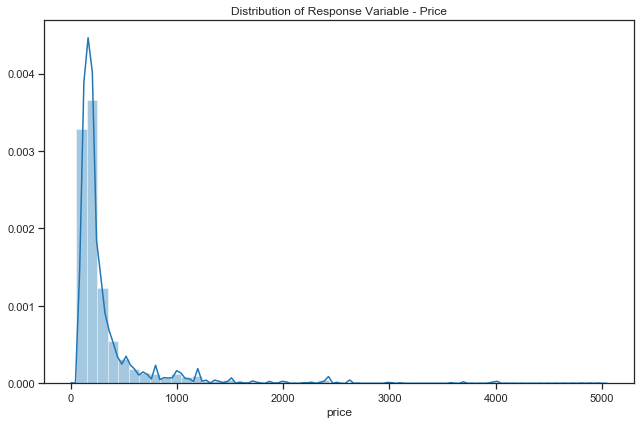

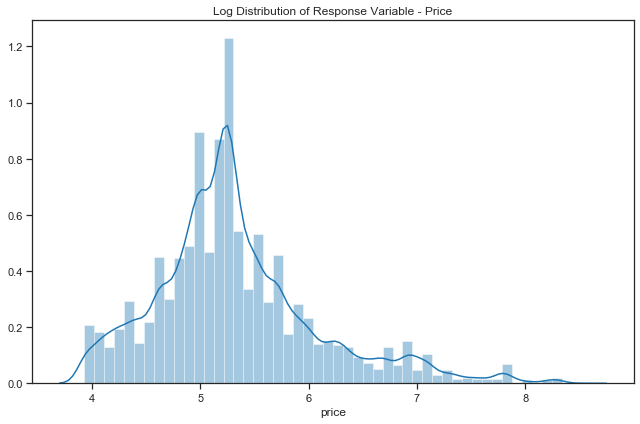

In [80]:
# Plot settings
sns.set_context('notebook') # optimise figures for notebook display
sns.set_style('ticks') # set default plot style
colours = ['#1F77B4', '#FF7F0E', '#2CA02C', '#DB2728', '#9467BD', '#8C564B', '#E377C2','#7F7F7F', '#BCBD22', '#17BECF']
crayon = ['#4E79A7','#F28E2C','#E15759','#76B7B2','#59A14F', '#EDC949','#AF7AA1','#FF9DA7','#9C755F','#BAB0AB']
sns.set_palette(colours) # set custom color scheme
%matplotlib inline
plt.rcParams['figure.figsize'] = (9, 6)


# Distribution of response variable - Price
plt.title('Distribution of Response Variable - Price')
sns.distplot(df_props['price'])
plt.tight_layout()
plt.show()


# Log Distribution of response variable - Price - Looks more normal 
import math
df_props1 =  df_props
log_price = np.log(df_props1['price'])

plt.title('Log Distribution of Response Variable - Price')
sns.distplot(log_price)
plt.tight_layout()
plt.show()

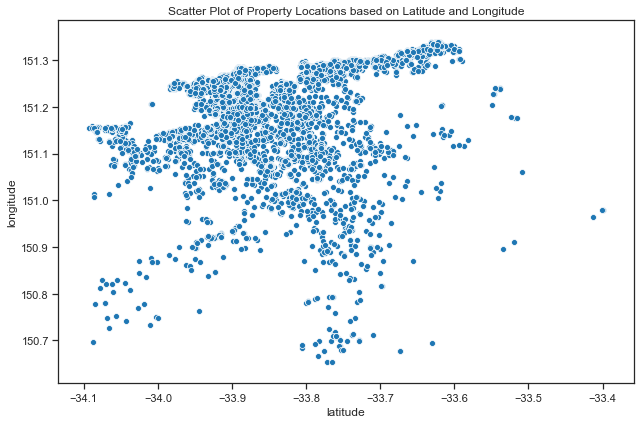

In [50]:
# Visualise how properties are distributed based on latitude and longitude
plt.title('Scatter Plot of Property Locations based on Latitude and Longitude')
sns.scatterplot(df_props['latitude'], df_props['longitude'])
plt.tight_layout()
plt.show()

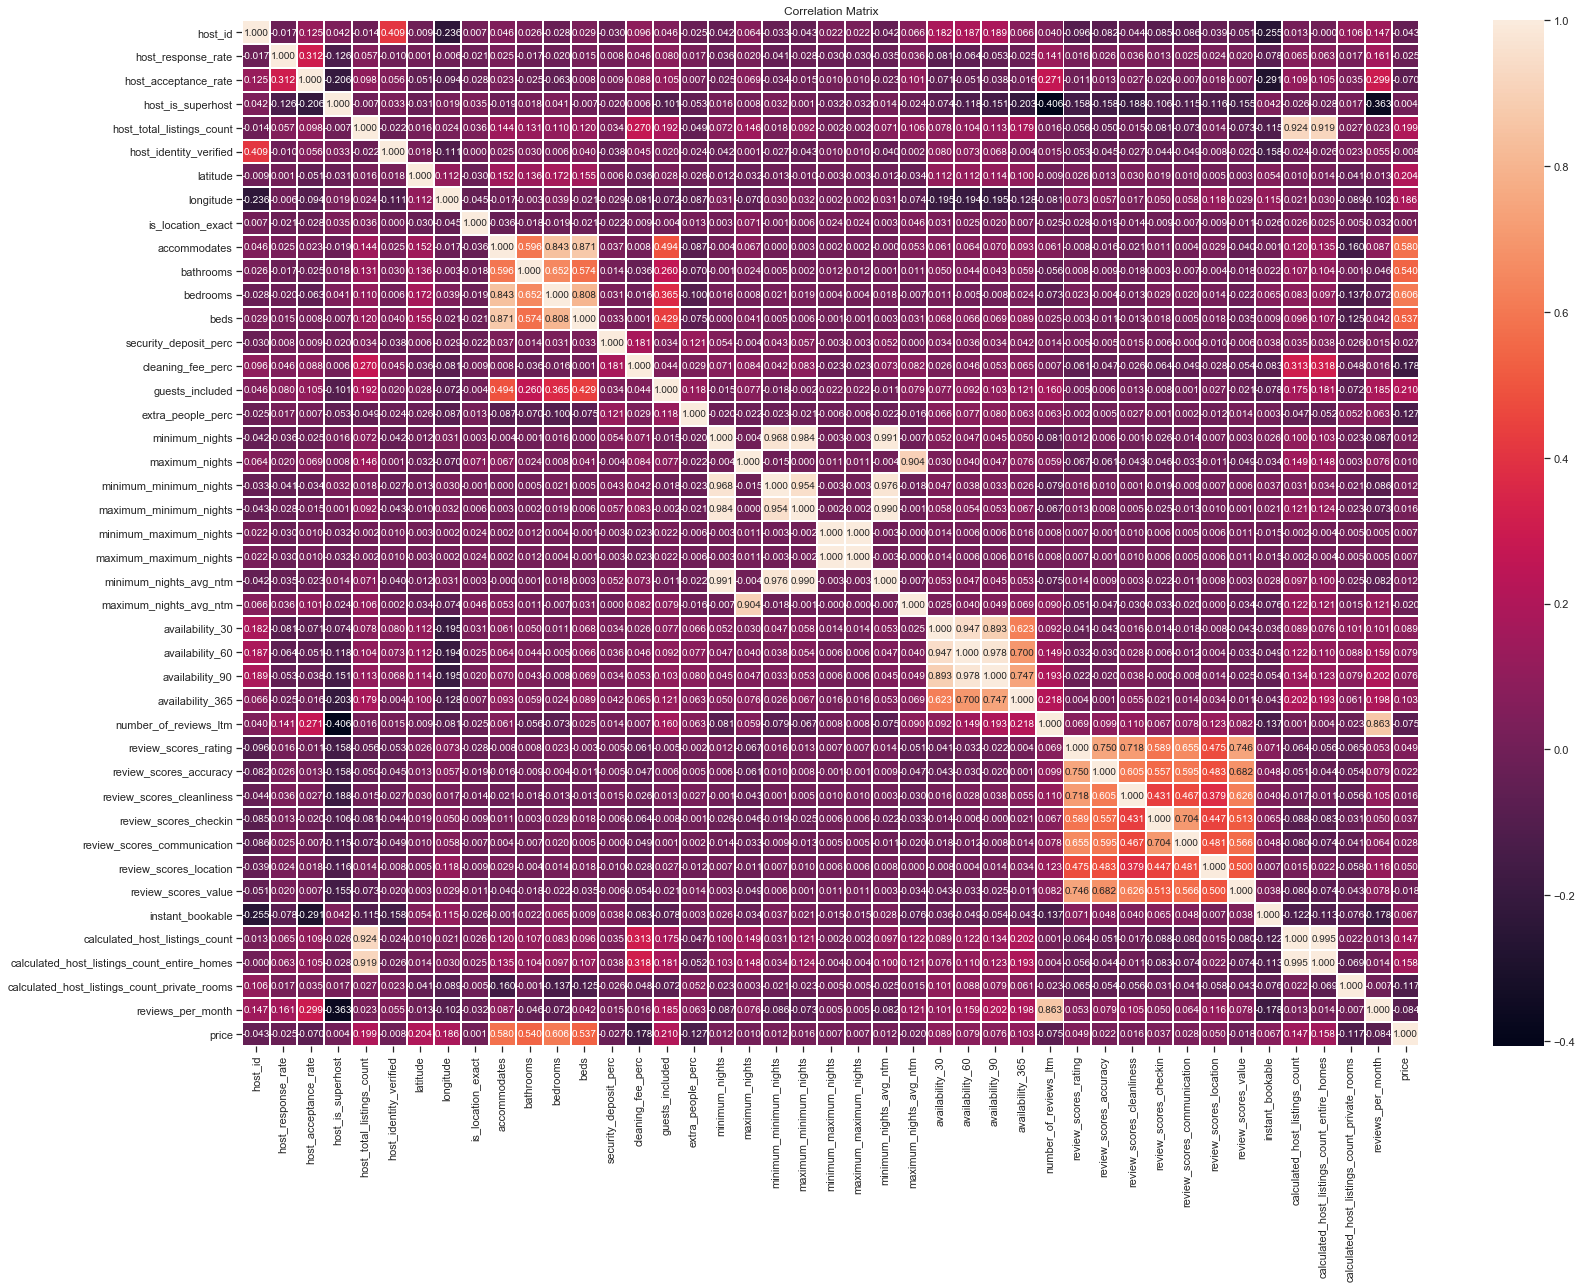

In [20]:
# correlation map
f,ax = plt.subplots(figsize=(24,18))
plt.title('Correlation Matrix')
sns.heatmap(df_props.corr(method='pearson'), annot=True, linewidths=1, fmt= '.3f',ax=ax)
plt.tight_layout()
plt.show()

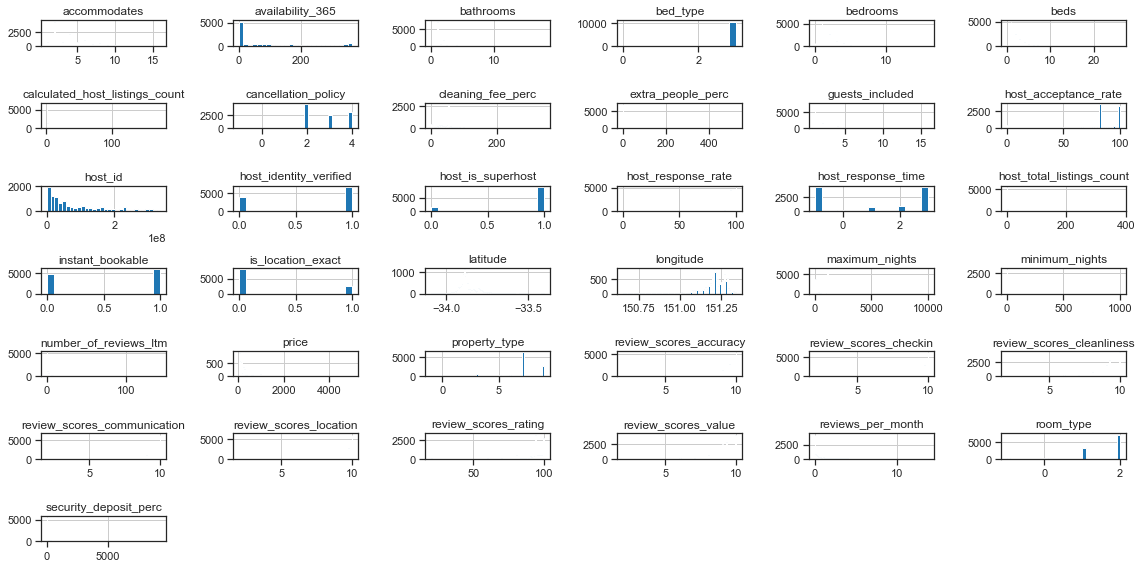

In [79]:
# Plot Histograms of all numeric columns to visualise distribution
df_props.hist(figsize = (16, 8), bins = 'auto')
plt.tight_layout()
plt.show()

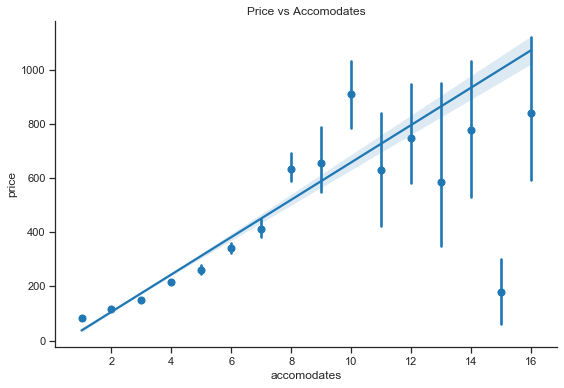

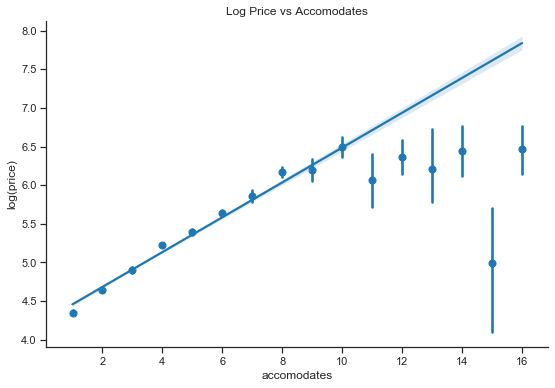

In [83]:
# Scatter plots of features which have high correlation to Price (response variable). 
# In case of discrete features such as bed type, property type, the mean values of price are plotted.
# Scatter plots of Accomodates to Price (response variable)
sns.regplot(df_props['accommodates'], df_props['price'],x_estimator=np.mean)
sns.despine()
plt.ylabel('price')
plt.xlabel('accomodates')
plt.title('Price vs Accomodates')
plt.show()

sns.regplot(df_props['accommodates'], log_price,x_estimator=np.mean)
sns.despine()
plt.ylabel('log(price)')
plt.xlabel('accomodates')
plt.title('Log Price vs Accomodates')
plt.show()
plt.show()

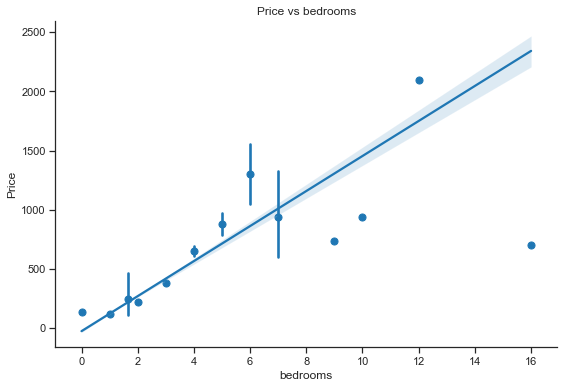

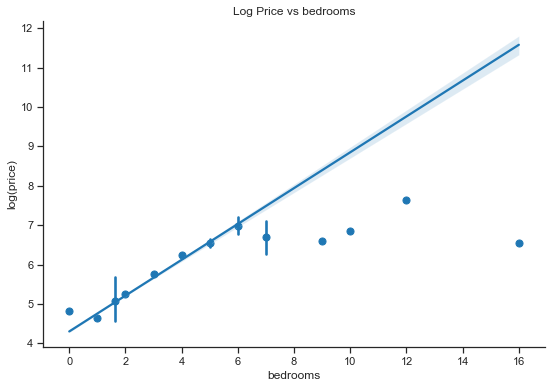

In [84]:
# Scatter plots of Bedrooms to Price (response variable)
sns.regplot(df_props['bedrooms'], df_props['price'], x_estimator=np.mean)
sns.despine()
plt.ylabel('Price')
plt.xlabel('bedrooms')
plt.title('Price vs bedrooms')
plt.show()

plt.show()


sns.regplot(df_props['bedrooms'], log_price,x_estimator=np.mean)
sns.despine()
plt.ylabel('log(price)')
plt.xlabel('bedrooms')
plt.title('Log Price vs bedrooms')
plt.show()


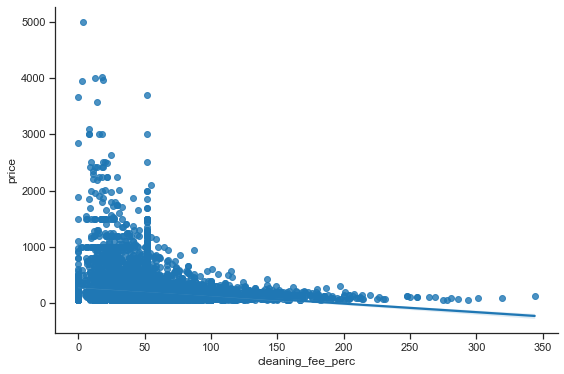

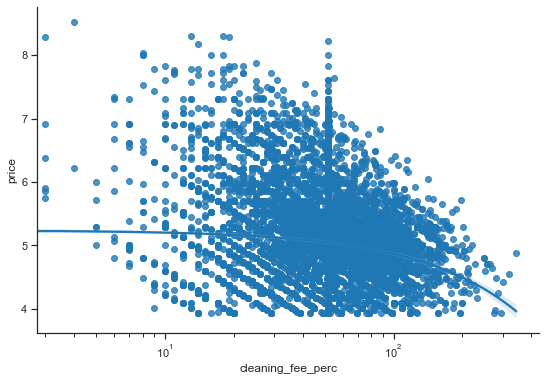

In [89]:
# Scatter plots of Cleaning Fees to Price (response variable)
c = sns.regplot(df_props['cleaning_fee_perc'], df_props['price'])
sns.despine()
plt.show()

# Scatter plots of Cleaning Fees to Price (response variable)
c = sns.regplot(df_props['cleaning_fee_perc'], log_price)
c.set(xscale="log")
sns.despine()
plt.show()

### Understanding different feature attributes

In [77]:
# Distribution of properties based on Property Type
df_props.groupby('property_type')['price'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
-1,132.0,217.39,187.81,51.0,121.0,159.0,240.0,1450.0
0,58.0,155.40,69.03,51.0,106.0,143.5,180.0,400.0
1,51.0,211.18,204.18,51.0,85.0,132.0,247.5,901.0
2,155.0,134.75,123.47,51.0,89.0,112.0,140.0,1200.0
3,451.0,185.32,155.45,51.0,74.0,140.0,250.0,1549.0
4,158.0,195.75,231.38,51.0,95.0,129.0,199.0,1700.0
5,216.0,124.97,71.37,51.0,80.0,110.0,144.0,500.0
6,208.0,148.12,122.80,51.0,80.0,125.0,171.5,1250.0
7,6439.0,170.65,148.40,51.0,95.0,140.0,199.0,3669.0


In [78]:
# Distribution of properties based on Bed Type
df_props.groupby('bed_type')['price'].describe().round(2) 

,count,mean,std,min,25%,50%,75%,max
bed_type,,,,,,,,
0,2.0,273.50,314.66,51.0,162.25,273.5,384.75,496.0
1,10.0,120.90,76.94,51.0,75.50,88.5,140.75,301.0
2,28.0,151.25,161.77,55.0,79.00,102.0,130.50,850.0
3,10595.0,218.23,269.77,51.0,89.00,144.0,231.00,5000.0


In [79]:
# Distribution of properties based on Room Type
df_props.groupby('room_type')['price'].describe().round(2) 

,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
-1,65.0,177.83,129.89,51.0,121.0,159.0,199.0,999.0
0,65.0,107.58,80.67,51.0,60.0,74.0,106.0,390.0
1,3171.0,94.20,72.40,51.0,60.0,77.0,100.0,1500.0
2,7334.0,272.82,305.06,51.0,129.0,180.0,290.0,5000.0


In [52]:
pd.options.display.max_columns = None
df_props.head()

,name,summary,space,description,experiences_offered,neighborhood_overview,transit,access,interaction,house_rules,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_identity_verified,neighbourhood_cleansed,zipcode,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,security_deposit_perc,cleaning_fee_perc,guests_included,extra_people_perc,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,reviews_per_month,price
0,Brand New House with Private Bathroom Miranda,New house built in (Phone number hidden by Air...,Guests are welcomed to use all amenities avail...,New house built in (Phone number hidden by Air...,none,There’s a massive Westfield shopping centre ne...,Miranda train station is about 10-15 mins walk...,"Family area, living area, laundry area, backya...",I don’t personally live in the house anymore a...,Missing Value,50605711,2015-12-05,3,100.000000,100.000000,0,5.0,5.0,"['email', 'phone', 'jumio', 'offline_governmen...",0,Sutherland Shire,2228,-34.02896,151.10229,1,9,1,2,1.0,1.0,1.0,3,"{TV,Kitchen,""Free parking on premises"",Breakfa...",203.0,0.000000,1,0.0,1,1125,1,1,1125,1125,1.0,1125.0,22,43,43,43,48,48,2020-01-24,95.000000,10.000000,10.000000,10.000000,10.00000,9.000000,10.000000,1,2,4,0,4,4.35,74.0
1,Single bedroom apartment in heart of Randwick,"Furnished, single bedroom apartment, Bedroom, ...",Missing Value,"Furnished, single bedroom apartment, Bedroom, ...",none,Randwick junction is at 5 minutes walk with al...,"Al the major bus stops to Sydney CBD, Bondi Be...",Missing Value,Host 'll be available 24/7 on call and nearby,Missing Value,120832230,2017-03-15,-1,95.022229,82.784851,0,1.0,1.0,"['email', 'phone']",0,Randwick,2031,-33.91539,151.23659,1,7,1,2,1.0,1.0,2.0,3,"{Kitchen,Heating,Washer,Dryer,""Smoke detector""...",0.0,51.773662,1,0.0,3,26,3,3,26,26,3.0,26.0,0,0,0,0,0,0,NaN,93.485013,9.557727,9.248028,9.730251,9.72478,9.726272,9.313997,0,2,1,0,1,0.00,63.0
2,Couples stylish retreat 10 mins to Sydney city,Stylish Victorian terrace. 1 king size bed and...,"Bedroom king size bed ,bathroom, lounge, dinin...",Stylish Victorian terrace. 1 king size bed and...,none,"7 mins walk to train station, 1 stop to thrivi...","Parramatta road 2 minutes buses to everywhere,...",The whole house except for 2 private rooms.,"Available for questions by email, phone or text.",When leaving please strip bed put all used lin...,35339631,2015-06-08,3,100.000000,100.000000,1,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",0,Marrickville,2048,-33.88847,151.16651,1,9,2,2,1.0,1.0,1.0,3,"{TV,Wifi,""Air conditioning"",Kitchen,Breakfast,...",568.0,102.000000,1,0.0,1,1125,1,1,1125,1125,1.0,1125.0,0,10,40,40,0,0,NaN,93.485013,9.557727,9.248028,9.730251,9.72478,9.726272,9.313997,0,2,1,1,0,0.00,176.0
3,Manly Retreat with Sweeping Harbour Views,This stunning coastal retreat is a few metres ...,2 Bedroom Scandinavian inspired beach apartmen...,This stunning coastal retreat is a few metres ...,none,Fairlight is a calm harbourside neighbourhood ...,A flat water beach with ocean pool is located ...,"Full apartment including balcony, washing mach...",Hosts are contactable via text message but may...,- No shoes inside - Be considerate of neighbou...,115440332,2017-02-08,-1,95.022229,82.784851,0,1.0,1.0,"['email', 'phone', 

In [12]:
##Final Data
df_props_final = df_props

# NLP Models

In [88]:
# #Import Libraries and Define Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#Set benchmark parameters
vect_tfidf = TfidfVectorizer(stop_words = 'english', max_features = 500)
lin_reg_tfidf = LinearRegression()

#Defining the corpus
y_tfidf = df_props_final['summary']

#Setting up the tfidf
tfidf = vect_tfidf.fit_transform(y_tfidf)

#Splitting test data from training data
from sklearn.model_selection import train_test_split
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(tfidf, df_props_final['price'], test_size = 0.3)

#Setting up linear regression model
lin_reg = lin_reg_tfidf.fit(X_train_tfidf, y_train_tfidf)

In [89]:
#Testing tfidf model 1

print("Mean Training data accuracy: {:.3f}".format(lin_reg.score(X_train_tfidf, y_train_tfidf)))
print("Test data accuracy: {:.3f}".format(lin_reg.score(X_test_tfidf, y_test_tfidf)))

Mean Training data accuracy: 0.512
Test data accuracy: 0.468


In [ ]:
#Defining the corpus
y_tfidf1 = df_props_final['neighborhood_overview']

#Setting up the tfidf
tfidf1 = vect_tfidf.fit_transform(y_tfidf1)

#Splitting test data from training data
from sklearn.model_selection import train_test_split
X_train_tfidf1, X_test_tfidf1, y_train_tfidf1, y_test_tfidf1 = train_test_split(tfidf1, df_props_final['price'], test_size = 0.3)

#Setting up linear regression model
lin_reg1 = lin_reg_tfidf.fit(X_train_tfidf1, y_train_tfidf1)

In [63]:
#Testing tfidf model 2

print("Mean Training data accuracy: {:.3f}".format(lin_reg1.score(X_train_tfidf1, y_train_tfidf1)))
print("Test data accuracy: {:.3f}".format(lin_reg1.score(X_test_tfidf1, y_test_tfidf1)))

Mean Training data accuracy: 0.135
Test data accuracy: -0.002


In [96]:
#Defining the corpus
y_tfidf2 = df_props_final['house_rules']

#Setting up the tfidf
tfidf2 = vect_tfidf.fit_transform(y_tfidf2)

#Splitting test data from training data
from sklearn.model_selection import train_test_split
X_train_tfidf2, X_test_tfidf2, y_train_tfidf2, y_test_tfidf2 = train_test_split(tfidf2, df_props_final['price'], test_size = 0.3)

#Setting up linear regression model
lin_reg2 = lin_reg_tfidf.fit(X_train_tfidf2, y_train_tfidf2)

In [97]:
#Testing tfidf model 3

print("Mean Training data accuracy: {:.3f}".format(lin_reg2.score(X_train_tfidf2, y_train_tfidf2)))
print("Test data accuracy: {:.3f}".format(lin_reg2.score(X_test_tfidf2, y_test_tfidf2)))

Mean Training data accuracy: 0.281
Test data accuracy: 0.257


In [98]:
#Defining the corpus
y_tfidf3 = df_props_final['amenities']

#Setting up the tfidf
tfidf3 = vect_tfidf.fit_transform(y_tfidf3)

#Splitting test data from training data
from sklearn.model_selection import train_test_split
X_train_tfidf3, X_test_tfidf3, y_train_tfidf3, y_test_tfidf3 = train_test_split(tfidf3, df_props_final['price'], test_size = 0.3)

#Setting up linear regression model
lin_reg3 = lin_reg_tfidf.fit(X_train_tfidf3, y_train_tfidf3)

In [68]:
#Testing tfidf model 4

print("Mean Training data accuracy: {:.3f}".format(lin_reg3.score(X_train_tfidf3, y_train_tfidf3)))
print("Test data accuracy: {:.3f}".format(lin_reg3.score(X_test_tfidf3, y_test_tfidf3)))

Mean Training data accuracy: 0.269
Test data accuracy: 0.215


# Multivariate OLS

In [13]:
#Non-text data is dropped for the non-NLP models
df_new = df_props_final.select_dtypes(include=['float64', 'int64', 'uint8'])

In [14]:
def prepModel(df_name,trn_size):
    # The function accepts a pandas dataframe and training set size as inputs
    # Splits the input data into train and validation set
    # Returns train and test features and responses
    
    # Randomly split indexes into train and test
    index_train, index_test  = train_test_split(np.array(df_name.index), train_size= 0.7, random_state=4)

    # Create training and test sets 
    train = df_name.loc[index_train,:].copy()
    test =  df_name.loc[index_test,:].copy()

    # Define response and feature variables
    response = df_name.columns.values[-1]
    features = df_name.columns.values[:-1]

    y_train = train[response] # selects the response variable
    X_train = train[features].copy() # selects the variables in the predictor list
    y_test = test[response]
    X_test = test[features].copy()

    return X_train,y_train,X_test,y_test

In [15]:
# Split the input data into train and validation set
X_train,y_train,X_test,y_test = prepModel(df_new, 0.7)

In [75]:
# Linear Regression Model
ols_best = LinearRegression()
ols_best.fit(X_train, y_train)
ols_best.coef_

array([ 5.21421573e-08,  4.07133814e-01, -2.66977725e-01, -7.20925716e-02,
       -1.45040027e+01,  2.24500442e+00,  1.66737297e+01,  1.83990751e+02,
        4.49606149e+02,  1.57969871e+01,  4.01240065e+00,  4.41988235e+01,
        2.80788656e+01,  7.40337009e+01,  4.49907435e+01,  4.32514573e+00,
       -3.42818942e+00, -1.94591453e-02, -1.71829620e+00, -1.21343860e+01,
       -3.43528527e-01,  2.69103832e-02, -2.95873534e-03,  1.80192390e-01,
        5.49403288e-02,  1.56984664e+00,  3.71549100e+00,  3.24021281e+00,
        1.02397560e+00, -1.97526780e+00,  6.95966630e+00, -1.48903535e+01,
        4.62495550e+00, -7.45995965e+00, -1.35483209e+00, -1.87464212e+01])

### Lasso

In [109]:
%%time
from sklearn.pipeline import Pipeline
lasso =  Pipeline([('scaler', StandardScaler()), ('estimator', Lasso())])

lasso_search = {
                'estimator__alpha' : list(np.logspace(-15, 15, 151, base=2))
               }

lasso_search = RandomizedSearchCV(lasso, lasso_search, cv = 5, n_iter= 64, return_train_score=False, n_jobs=4, random_state=1)
lasso_search.fit(X_train, y_train)

lasso_best = lasso_search.best_estimator_

print('Best parameters found by randomised search:', lasso_search.best_params_, '\n')

Best parameters found by randomised search: {'estimator__alpha': 3.4822022531844983} 

Wall time: 19.5 s


In [110]:
#Testing Lasso

print("Mean Training data accuracy: {:.3f}".format(lasso_best.score(X_train, y_train)))
print("Test data accuracy: {:.3f}".format(lasso_best.score(X_test, y_test)))

Mean Training data accuracy: 0.517
Test data accuracy: 0.522


### Ridge Regression

In [24]:
%%time

ridge = Pipeline([('scaler', StandardScaler()), ('estimator', Ridge())])

ridge_search = {
             'estimator__alpha' : list(np.logspace(-15, 15, 151, base=2))
           }

ridge_search = RandomizedSearchCV(ridge, ridge_search, cv = 5, n_iter= 64, return_train_score=False, n_jobs=4, random_state=1)
ridge_search.fit(X_train, y_train)

ridge_best = ridge_search.best_estimator_

print('Best parameters found by randomised search:', ridge_search.best_params_, '\n')

Best parameters found by randomised search: {'estimator__alpha': 337.7940251578614} 

Wall time: 11.9 s


In [112]:
#Testing Lasso

print("Mean Training data accuracy: {:.3f}".format(ridge_best.score(X_train, y_train)))
print("Test data accuracy: {:.3f}".format(ridge_best.score(X_test, y_test)))

Mean Training data accuracy: 0.522
Test data accuracy: 0.526


## Decision Tree

In [22]:
%%time

dt = DecisionTreeRegressor()

dt_search = {
         'criterion': ['mse', 'friedman_mse', 'mae'],
         'min_samples_leaf': [1,10, 20, 30, 50],
         'max_features': np.arange(1, 6)
        }

dt_search = RandomizedSearchCV(dt, dt_search, cv = 5, n_iter= 64, return_train_score=False, n_jobs=4, random_state=1)
dt_search.fit(X_train, y_train)

dt_best = dt_search.best_estimator_

print('Best parameters found by randomised search:', dt_search.best_params_, '\n')

Best parameters found by randomised search: {'min_samples_leaf': 20, 'max_features': 5, 'criterion': 'friedman_mse'} 

Wall time: 44.3 s


In [113]:
#Testing Decision Tree

print("Mean Training data accuracy: {:.3f}".format(dt_best.score(X_train, y_train)))
print("Test data accuracy: {:.3f}".format(dt_best.score(X_test, y_test)))

Mean Training data accuracy: 0.592
Test data accuracy: 0.570


# Random Forest

In [114]:
%%time

rf = RandomForestRegressor(n_estimators=100, max_features = 3, min_samples_leaf= 1)

rf_search = {
    'min_samples_leaf': [1, 10, 20, 30, 50],
    'max_features': np.arange(1, 6)
}

rf_search = RandomizedSearchCV(rf, rf_search, cv = 5, n_iter= 25, return_train_score=False, n_jobs=4, random_state=1)
rf_search.fit(X_train, y_train)

rf_best = rf_search.best_estimator_

print('Best parameters found by randomised search:', rf_search.best_params_, '\n')

Best parameters found by randomised search: {'min_samples_leaf': 1, 'max_features': 5} 

Wall time: 1min 8s


In [115]:
#Testing Random Forest

print("Mean Training data accuracy: {:.3f}".format(rf_best.score(X_train, y_train)))
print("Test data accuracy: {:.3f}".format(rf_best.score(X_test, y_test)))

Mean Training data accuracy: 0.958
Test data accuracy: 0.702


In [99]:
#Save this space for tree diagram

## Bagging

In [26]:
%%time

bagging = BaggingRegressor(n_estimators=100)

bag_search = {
         'n_estimators' : [250, 500, 750, 1000, 1500],
         'max_features': np.arange(1, 6)
         }

bag_search = RandomizedSearchCV(bagging, bag_search, cv = 5, n_iter= 30, return_train_score=False, n_jobs=4, random_state=1)
bag_search.fit(X_train, y_train)

bag_best = bag_search.best_estimator_

print('Best parameters found by randomised search:', bag_search.best_params_, '\n')

C:\Users\61406\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 25 is smaller than n_iter=30. Running 25 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Best parameters found by randomised search: {'n_estimators': 1500, 'max_features': 5} 

Wall time: 8min 47s


In [116]:
#Testing Bagging

print("Mean Training data accuracy: {:.3f}".format(bag_best.score(X_train, y_train)))
print("Test data accuracy: {:.3f}".format(bag_best.score(X_test, y_test)))

Mean Training data accuracy: 0.828
Test data accuracy: 0.535


# K-Nearest Neighbours

In [33]:
%%time

knn = Pipeline([('scaler', StandardScaler()), ('estimator', KNeighborsRegressor(n_neighbors=10))])

knn_search = {
          'estimator__n_neighbors': [3, 5, 7, 9, 11],
          'estimator__algorithm': ['auto','ball_tree','kd_tree','brute'],
          'estimator__metric': ['euclidean', 'mahalanobis', 'chebyshev', 'manhattan', 'minkowski']
         }

knn_search = RandomizedSearchCV(knn, knn_search, cv = 5, n_iter= 16, return_train_score=False, n_jobs=4, random_state=1)
knn_search.fit(X_train, y_train)

knn_best = knn_search.best_estimator_

print('Best parameters found by randomised search:', knn_search.best_params_, '\n')

Best parameters found by randomised search: {'estimator__n_neighbors': 9, 'estimator__metric': 'manhattan', 'estimator__algorithm': 'brute'} 

Wall time: 2min 34s


In [117]:
#Testing kNN

print("Mean Training data accuracy: {:.3f}".format(knn_best.score(X_train, y_train)))
print("Test data accuracy: {:.3f}".format(knn_best.score(X_test, y_test)))

Mean Training data accuracy: 0.668
Test data accuracy: 0.615


## XGBoost

In [30]:
%%time

xgb = xgb.XGBRegressor()

xgb_search = {
            'learning_rate': [0.01, 0.05, 0.1],
            'n_estimators' : [250, 500, 750, 1000, 1500],
            'max_depth' : [2 ,3, 4],
            'subsample' : [0.6, 0.8, 1.0]
        }

xgb_search = RandomizedSearchCV(xgb, xgb_search, cv = 5, n_iter= 30, return_train_score=False, n_jobs=4, random_state=1)
xgb_search.fit(X_train, y_train)

xgb_best = xgb_search.best_estimator_

print('Best parameters found by randomised search:', xgb_search.best_params_, '\n')

Best parameters found by randomised search: {'subsample': 0.6, 'n_estimators': 500, 'max_depth': 4, 'learning_rate': 0.05} 

Wall time: 9min 53s


In [119]:
#Testing XGBoost

print("Mean Training data accuracy: {:.3f}".format(xgb_best.score(X_train, y_train)))
print("Test data accuracy: {:.3f}".format(xgb_best.score(X_test, y_test)))

Mean Training data accuracy: 0.927
Test data accuracy: 0.760


## Gradient Boost

In [31]:
%%time

gb = GradientBoostingRegressor()

gb_search = {
         'learning_rate': [0.01, 0.05, 0.1],
         'n_estimators' : [250, 500, 750, 1000, 1500],
         'max_depth' : [2 ,3, 4],
         'subsample' : [0.6, 0.8, 1.0]
        }

gb_search = RandomizedSearchCV(gb, gb_search, cv = 5, n_iter= 30, return_train_score=False, n_jobs=4, random_state=1)
gb_search.fit(X_train, y_train)

gb_best = gb_search.best_estimator_

print('Best parameters found by randomised search:', gb_search.best_params_, '\n')

Best parameters found by randomised search: {'subsample': 0.6, 'n_estimators': 1500, 'max_depth': 4, 'learning_rate': 0.01} 

Wall time: 22min 35s


In [120]:
#Testing Gradient Boost

print("Mean Training data accuracy: {:.3f}".format(gb_best.score(X_train, y_train)))
print("Test data accuracy: {:.3f}".format(gb_best.score(X_test, y_test)))

Mean Training data accuracy: 0.910
Test data accuracy: 0.757


# Model Stacking 

In [81]:
%%time

models = [xgb_best,gb_best ]

stack_best = StackingCVRegressor(models, meta_regressor = LinearRegression(), cv = 10,random_state=1)
stack_best.fit(X_train.values, y_train.ravel())

Wall time: 11min 14s


StackingCVRegressor(cv=10,
                    meta_regressor=LinearRegression(copy_X=True,
                                                    fit_intercept=True,
                                                    n_jobs=None,
                                                    normalize=False),
                    n_jobs=None, pre_dispatch='2*n_jobs', random_state=1,
                    refit=True,
                    regressors=[XGBRegressor(base_score=0.5, booster='gbtree',
                                             colsample_bylevel=1,
                                             colsample_bynode=1,
                                             colsample_bytree=1, gamma=0,
                                             gpu_id=-1, importance_type='gain',
                                             interaction_co...
                                                          min_impurity_decrease=0.0,
                                                          min_impurity_split=None,


# Model Evaluation

In [82]:
# Evaluate models using R-Squared and RMSE
# Initialise table
columns=['RMSE', 'R-Squared']
rows=['OLS','Lasso','Ridge','Tree','Random Forest','Bagging','k-Nearest Neighbor','XGBoost','Gradient Boosting',
      'Model Stacking']
results =pd.DataFrame(0.0, columns=columns, index=rows)

# List algorithms
methods = [ols_best, lasso_best, ridge_best, dt_best, rf_best, bag_best,knn_best, xgb_best, gb_best, stack_best] 

# Compute test predictions and metrics


# Compute test predictions and metrics
for i, method in enumerate(methods):
    if method != stack_best:
        y_pred = method.predict(X_test)
      
    else:
        y_pred = method.predict(X_test.values)
        
    results.iloc[i, 0] = np.sqrt(mean_squared_error(y_test, y_pred))
    results.iloc[i, 1] = r2_score(y_test, y_pred)

results.round(4).sort_values(by=['R-Squared'], ascending=False)
        

,RMSE,R-Squared
XGBoost,132.8456,0.7597
Model Stacking,133.3195,0.7580
Gradient Boosting,133.7191,0.7566
Random Forest,145.3738,0.7123
k-Nearest Neighbor,168.2657,0.6145
Tree,177.6451,0.5704
Bagging,184.8646,0.5347
OLS,185.8179,0.5299
Ridge,186.5432,0.5262
Lasso,187.3485,0.5221


In [112]:
#Testing something - Delete during submission
y_predols = rf_best.predict(X_test)
z= np.sqrt(mean_squared_error(y_test, y_predols))
print(z)

# Final Model Implementation

### Model loading and data pre processing

In [56]:
#Load Data
def loadData(input_data):
    # Load csv to a pandas data frame
    df = pd.read_csv(input_data,
                     skipinitialspace = True, # to remove leading spaces in data
                     error_bad_lines = True # Throw error in case of any issue
                    )
    print('Loaded')
    return df


df_test_raw = pd.read_csv('test.csv') 

In [57]:
#Convert Objects to Float
df_test_raw['host_acceptance_rate'] = df_test_raw['host_acceptance_rate'].str.replace('%', '').astype(float)
df_test_raw['host_response_rate'] = df_test_raw['host_response_rate'].str.replace('%', '').astype(float)


In [ ]:
#Get Dummy Variables
df_test_raw['host_is_superhost'] = pd.get_dummies(df_test_raw['host_is_superhost'])
df_test_raw['host_identity_verified'] = pd.get_dummies(df_test_raw['host_identity_verified'])
df_test_raw['instant_bookable'] = pd.get_dummies(df_test_raw['instant_bookable'])
df_test_raw['is_location_exact'] = pd.get_dummies(df_test_raw['is_location_exact'])
df_test_raw['require_guest_phone_verification'] = pd.get_dummies(df_test_raw['require_guest_phone_verification'])
df_test_raw['requires_license'] = pd.get_dummies(df_test_raw['requires_license'])
df_test_raw['is_business_travel_ready'] = pd.get_dummies(df_test_raw['is_business_travel_ready'])

In [58]:
#Drop unwanted features
df_test_raw = df_test_raw.drop(['calculated_host_listings_count_shared_rooms','square_feet','monthly_discount','weekly_discount','notes',
                         'require_guest_phone_verification','require_guest_profile_picture','require_guest_profile_picture','is_business_travel_ready',
                         'requires_license','neighbourhood','host_location','require_guest_phone_verification','require_guest_phone_verification','host_neighbourhood',
                         'first_review','host_listings_count','number_of_reviews', 'last_review','city', 'smart_location', 'street','host_about'], axis = 1)

#Another round of dropping features 
df_test_raw = df_test_raw.drop(['experiences_offered', 'zipcode', 'minimum_minimum_nights', 'maximum_minimum_nights', 
                         'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 
                         'maximum_nights_avg_ntm', 'availability_30', 'availability_60', 'availability_90', 
                         'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms'], axis = 1)

In [60]:
#Fill Null Values with Missing values
df_test_raw["description"].fillna("Missing Value", inplace = True) 
df_test_raw["house_rules"].fillna("Missing Value", inplace = True)
df_test_raw["interaction"].fillna("Missing Value", inplace = True)
df_test_raw["neighborhood_overview"].fillna("Missing Value", inplace = True)
df_test_raw["transit"].fillna("Missing Value", inplace = True)
df_test_raw["space"].fillna("Missing Value", inplace = True)
df_test_raw["access"].fillna("Missing Value", inplace = True)
df_test_raw["host_response_time"].fillna("Missing Value", inplace = True)

#Fill Null Values with Mean   
df_test_raw['host_response_rate'].fillna(value = df_test_raw['host_response_rate'].mean(), inplace=True)
df_test_raw['host_acceptance_rate'].fillna(value = df_test_raw['host_acceptance_rate'].mean(), inplace=True)
df_test_raw['review_scores_checkin'].fillna(value = df_test_raw['review_scores_checkin'].mean(), inplace=True)
df_test_raw['review_scores_location'].fillna(value = df_test_raw['review_scores_location'].mean(), inplace=True)
df_test_raw['review_scores_value'].fillna(value = df_test_raw['review_scores_value'].mean(), inplace=True)
df_test_raw['review_scores_accuracy'].fillna(value = df_test_raw['review_scores_accuracy'].mean(), inplace=True)
df_test_raw['review_scores_communication'].fillna(value = df_test_raw['review_scores_communication'].mean(), inplace=True)
df_test_raw['review_scores_cleanliness'].fillna(value = df_test_raw['review_scores_cleanliness'].mean(), inplace=True)
df_test_raw['review_scores_rating'].fillna(value = df_test_raw['review_scores_rating'].mean(), inplace=True)                    
df_test_raw['cleaning_fee_perc'].fillna(value = df_test_raw['cleaning_fee_perc'].mean(), inplace=True)
df_test_raw['beds'].fillna(value = df_test_raw['bedrooms'], inplace=True)
df_test_raw['bedrooms'].fillna(value = df_test_raw['bedrooms'].mean(), inplace=True)
df_test_raw['bathrooms'].fillna(value = df_test_raw['bedrooms'].mean(), inplace=True)
df_test_raw['beds'].fillna((df_test_raw['beds'].mean()), inplace=True)
df_test_raw['reviews_per_month'].fillna((0), inplace=True)
df_test_raw['security_deposit_perc'].fillna((0), inplace=True)    

In [61]:
#Ordinal Variables
df_test_raw["property_type"].replace(dict.fromkeys(['Aparthotel','Bed and breakfast','Boat','Boutique hotel','Cabin','Camper/RV','Castle'
                                            'Cottage','Earth House','Farm Stay','Heritage Hotel (India)','Hostel',
                                            'Hotel','Island','Other','Tiny House','Train','Yurt'], 'Other'), inplace=True)

def prepData_ordinal(df_name,col_name,ordered_list):
    # This function accepts a pandas dataframe, column name and ordered list as inputs
    # Converts the column to a categorical data type and assigns numeric labels as per defined order
    # Returns the dataframe back as the output
    df_name[col_name] = pd.Categorical(df_name[col_name], categories = ordered_list, ordered = True)
    df_name[col_name] = pd.factorize(df_name[col_name],sort=True)[0]
    return df_name

# Define the ordering of values in a column
hrt_ord = ['a few days or more','within a day','within a few hours','within an hour']
room_type_ord = ['Shared room','Private room','Entire home/apt']
bed_type_ord = ['Couch', 'Futon', 'Pull-out Sofa', 'Real Bed']
cp_ord = ['missing','super_strict_60', 'super_strict_30', 'strict_14_with_grace_period','moderate', 'luxury_super_strict_25',
          'luxury_moderate', 'flexible']
prop_type_ord = ['Loft', 'Bungalow', 'Guesthouse', 'Townhouse','Serviced Apartment', 'Other', 'Guest suite', 'Condominium', 
                 'Apartment','Villa','House']

# Convert the ordered categories to numeric labels
df_test_raw = prepData_ordinal(df_test_raw,'host_response_time',hrt_ord)
df_test_raw = prepData_ordinal(df_test_raw,'room_type',room_type_ord)
df_test_raw = prepData_ordinal(df_test_raw,'bed_type',bed_type_ord)
df_test_raw = prepData_ordinal(df_test_raw,'cancellation_policy',cp_ord)
df_test_raw = prepData_ordinal(df_test_raw,'property_type',prop_type_ord)



In [62]:
#Remove Text fields 
df_test_raw = df_test_raw.select_dtypes(include=['float64', 'int64', 'uint8'])

In [63]:
df_test_raw1=df_test_raw

In [65]:
df_test_raw = df_test_raw.drop(['id'],axis = 1)

# Final model Implementation and output generation

In [80]:
method = [ols_best, lasso_best, ridge_best, dt_best, rf_best, bag_best,knn_best, xgb_best, gb_best, stack_best] 

method_nm = ['OLS','Lasso','Ridge','Tree','Random Forest','Bagging','k-Nearest Neighbor','XGBoost','Gradient Boosting',
      'Model Stacking']



# Compute test predictions and metrics
for i, method in enumerate(methods):
    if method != stack_best:
        y_predt = method.predict(df_test_raw)

    else:
        y_predt = method.predict(df_test_raw.values)
    # Set Output Folder & file name
    out_file = method_nm[i] + '_group124_kaggle_submission.csv'
    out_data = os.path.join(input_folder,'output',out_file)
    submission = pd.DataFrame(np.c_[df_test_raw1.index, y_predt.round(2)], columns=['id', 'price'])
    submission['id'] = submission['id'].astype(int)
    submission.to_csv(out_data,  index=False)
    print('Predictions successfully generated for', method_nm[i])
    

Predictions successfully generated for OLS
Predictions successfully generated for Lasso
Predictions successfully generated for Ridge
Predictions successfully generated for Tree
Predictions successfully generated for Random Forest
Predictions successfully generated for Bagging
Predictions successfully generated for k-Nearest Neighbor
Predictions successfully generated for XGBoost
Predictions successfully generated for Gradient Boosting
Predictions successfully generated for Model Stacking


# Data Mining

In [83]:
df_props_final.head()

,name,summary,space,description,neighborhood_overview,transit,access,interaction,house_rules,host_id,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,calculated_host_listings_count,reviews_per_month,price
0,Brand New House with Private Bathroom Miranda,New house built in (Phone number hidden by Air...,Guests are welcomed to use all amenities avail...,New house built in (Phone number hidden by Air...,There’s a massive Westfield shopping centre ne...,Miranda train station is about 10-15 mins walk...,"Family area, living area, laundry area, backya...",I don’t personally live in the house anymore a...,Missing Value,50605711,...,10.000000,10.000000,10.00000,9.000000,10.000000,0,2,4,4.35,74.0
1,Single bedroom apartment in heart of Randwick,"Furnished, single bedroom apartment, Bedroom, ...",Missing Value,"Furnished, single bedroom apartment, Bedroom, ...",Randwick junction is at 5 minutes walk with al...,"Al the major bus stops to Sydney CBD, Bondi Be...",Missing Value,Host 'll be available 24/7 on call and nearby,Missing Value,120832230,...,9.248028,9.730251,9.72478,9.726272,9.313997,1,2,1,0.00,63.0
2,Couples stylish retreat 10 mins to Sydney city,Stylish Victorian terrace. 1 king size bed and...,"Bedroom king size bed ,bathroom, lounge, dinin...",Stylish Victorian terrace. 1 king size bed and...,"7 mins walk to train station, 1 stop to thrivi...","Parramatta road 2 minutes buses to everywhere,...",The whole house except for 2 private rooms.,"Available for questions by email, phone or text.",When leaving please strip bed put all used lin...,35339631,...,9.248028,9.730251,9.72478,9.726272,9.313997,1,2,1,0.00,176.0
3,Manly Retreat with Sweeping Harbour Views,This stunning coastal retreat is a few metres ...,2 Bedroom Scandinavian inspired beach apartmen...,This stunning coastal retreat is a few metres ...,Fairlight is a calm harbourside neighbourhood ...,A flat water beach with ocean pool is located ...,"Full apartment including balcony, washing mach...",Hosts are contactable via text message but may...,- No shoes inside - Be considerate of neighbou...,115440332,...,10.000000,10.000000,10.00000,10.000000,10.000000,1,2,1,0.33,195.0
4,Cozy bedroom just 5 min walking to Dee Why beach,"Our place is a cozy and light apartment, just ...",If it's necessary we can let a extra kids matt...,"Our place is a cozy and light apartment, just ...","Our building has just 8 suits, so it's pretty ...","If you come by bus from Manly, you can get off...","We also offer all kitchen aplliance, beach cha...",Missing Value,"- Please, no shoes in the house",25713478,...,10.000000,10.000000,10.00000,10.000000,10.000000,1,5,1,0.04,51.0


In [84]:
df_mining = df_props_final[['host_response_rate', 'host_acceptance_rate','latitude', 'longitude', 'price']]

In [85]:
# Randomly split indexes into train and test
index_train, index_test  = train_test_split(np.array(df_mining.index), train_size= 0.7, random_state=4)

In [86]:
def prepModel (df_name, trn_size):

    index_train , index_test = train_test_split(np.array(df_mining.index), train_size=0.7, random_state=4)

    mining_train = df_mining.loc[index_train,:].copy()
    mining_test = df_mining.loc[index_test,:].copy()
    
    # Define response and feature variables
    response = df_mining.columns.values[-1]
    features = df_mining.columns.values[:-1]
    
    y_mining_train = mining_train[response] # selects the response variable
    X_mining_train = mining_train[features].copy() # selects the variables in the predictor list
    y_mining_test = mining_test[response]
    X_mining_test = mining_test[features].copy()

    return X_mining_train, y_mining_train, X_mining_test, y_mining_test

In [87]:
# Split the input data into train and validation set
X_mining_train,y_mining_train,X_mining_test,y_mining_test = prepModel(df_mining, 0.7)

In [88]:
# Linear Regression Model
ols_mining = LinearRegression()
ols_mining.fit(X_mining_train, y_mining_train)
ols_mining.coef_

array([-2.46423384e-01, -5.08173299e-01,  6.18630839e+02,  5.50448220e+02])

In [89]:
print (ols_mining.coef_) #OLS REGRESSION COEFFICIENTS

[-2.46423384e-01 -5.08173299e-01  6.18630839e+02  5.50448220e+02]


In [90]:
import seaborn as sns
import statsmodels.api as sm
from statsmodels.api import add_constant
import numpy as np

In [91]:
mining_model = sm.OLS(y_mining_train, X_mining_train)

In [92]:
mining_results = mining_model.fit()

In [93]:
mining_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.429
Model:                            OLS   Adj. R-squared (uncentered):              0.429
Method:                 Least Squares   F-statistic:                              1400.
Date:                Fri, 20 Nov 2020   Prob (F-statistic):                        0.00
Time:                        16:50:45   Log-Likelihood:                         -51997.
No. Observations:                7444   AIC:                                  1.040e+05
Df Residuals:                    7440   BIC:                                  1.040e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
host_response_rate      -0.2375      0.239     -0.994      0.320      -0.706       0.231
host_acceptance_rate    -0.6141      0.138     -4.445      0.000      -0.885      -0.343
latitude               770.3472     39.416     19.544      0.000     693.081     847.614
longitude              174.4494      8.828     19.762      0.000     157.145     191.754
==============================================================================
Omnibus:                     8199.419   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           893051.510
Skew:                           5.556   Prob(JB):                         0.00
Kurtosis:                      55.496   Cond. No.                     2.67e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Decision Tree

In [94]:
%%time

dt_mining = DecisionTreeRegressor()

dt_mining_search = {
         'criterion': ['mse', 'friedman_mse', 'mae'],
         'min_samples_leaf': [1,10, 20, 30, 50],
         'max_features': np.arange(1, 6)
        }

dt_mining_search = RandomizedSearchCV(dt_mining, dt_mining_search, cv = 5, n_iter= 64, return_train_score=False, n_jobs=4, random_state=1)
dt_mining_search.fit(X_mining_train, y_mining_train)

dt_mining_best = dt_mining_search.best_estimator_

print('Best parameters found by randomised search:', dt_mining_search.best_params_, '\n')

Wall time: 1min 24s


Best parameters found by randomised search: {'min_samples_leaf': 50, 'max_features': 2, 'criterion': 'friedman_mse'} 



In [96]:
#Testing Decision Tree

print("Mean Training data accuracy: {:.3f}".format(dt_mining_search.score(X_mining_train,y_mining_train)))
print("Test data accuracy: {:.3f}".format(dt_mining_search.score(X_mining_test, y_mining_test)))

Mean Training data accuracy: 0.178
Test data accuracy: 0.104


In [97]:
dt_mining_best.feature_importances_

array([0.0238165 , 0.06447404, 0.27832336, 0.6333861 ])

In [121]:
df_mining_added = df_props_final[['host_response_rate', 'host_acceptance_rate','latitude', 'longitude', 'host_identity_verified','instant_bookable','host_response_time','host_total_listings_count', 'price']]

In [122]:
def prepModel (df_name, trn_size):

    index_train_added , index_test_added = train_test_split(np.array(df_mining_added.index), train_size=0.7, random_state=4)

    mining_train_added = df_mining_added.loc[index_train,:].copy()
    mining_test_added = df_mining_added.loc[index_test,:].copy()
    
    # Define response and feature variables
    response_added = df_mining_added.columns.values[-1]
    features_added = df_mining_added.columns.values[:-1]
    
    y_mining_train_added = mining_train_added[response_added] # selects the response variable
    X_mining_train_added = mining_train_added[features_added].copy() # selects the variables in the predictor list
    y_mining_test_added = mining_test_added[response_added]
    X_mining_test_added = mining_test_added[features_added].copy()

    return X_mining_train_added, y_mining_train_added, X_mining_test_added, y_mining_test_added

In [123]:
# Split the input data into train and validation set
X_mining_train_added,y_mining_train_added,X_mining_test_added,y_mining_test_added = prepModel(df_mining_added, 0.7)

In [124]:
# Linear Regression Model
ols_mining_added = LinearRegression()
ols_mining_added.fit(X_mining_train_added, y_mining_train_added)
ols_mining_added.coef_

array([-3.74160510e-01, -6.19289286e-01,  6.03929490e+02,  5.26623478e+02,
        1.77090176e+01,  2.24807164e+01,  1.00542565e+00,  1.73144277e+00])

In [125]:
print (ols_mining_added.coef_) #OLS REGRESSION COEFFICIENTS - OLS with extra features

[-3.74160510e-01 -6.19289286e-01  6.03929490e+02  5.26623478e+02
  1.77090176e+01  2.24807164e+01  1.00542565e+00  1.73144277e+00]


In [126]:
mining_model_added = sm.OLS(y_mining_train_added, X_mining_train_added)

In [127]:
mining_results_added = mining_model_added.fit()

In [128]:
mining_results_added.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.454
Model:                            OLS   Adj. R-squared (uncentered):              0.454
Method:                 Least Squares   F-statistic:                              774.2
Date:                Fri, 20 Nov 2020   Prob (F-statistic):                        0.00
Time:                        17:08:59   Log-Likelihood:                         -51830.
No. Observations:                7444   AIC:                                  1.037e+05
Df Residuals:                    7436   BIC:                                  1.037e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
host_response_rate           -0.3366      0.236     -1.425      0.154      -0.800       0.126
host_acceptance_rate         -0.6604      0.143     -4.632      0.000      -0.940      -0.381
latitude                    746.4147     38.628     19.323      0.000     670.693     822.136
longitude                   168.9233      8.653     19.522      0.000     151.961     185.886
host_identity_verified       12.1216      6.247      1.940      0.052      -0.124      24.368
instant_bookable             26.4556      6.369      4.154      0.000      13.971      38.941
host_response_time           -1.0805      1.741     -0.621      0.535      -4.493       2.332
host_total_listings_count     1.7992      0.101     17.827      0.000       1.601       1.997
==============================================================================
Omnibus:                     7969.716   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           812681.217
Skew:                           5.304   Prob(JB):                         0.00
Kurtosis:                      53.076   Cond. No.                     2.68e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.68e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""